# Using LSTM-RNN on datasets from yfinance to predict trends

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

# yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Downloading the data of Sun power coorporation from 2014-01-01 to 2023-01-14

In [20]:
# input
symbol = 'SPWR' #Sun power coorporation
start = '2014-01-01'
end = '2023-01-14'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.338572,21.185331,19.030779,21.152588,21.152588,6749951
2014-01-03,21.578259,21.768173,20.726915,21.434185,21.434185,5088880
2014-01-06,21.650295,21.905697,21.034710,21.244270,21.244270,5096973
2014-01-07,21.493124,22.220039,21.139488,21.434185,21.434185,5753125
2014-01-08,21.296659,21.984283,21.218075,21.630648,21.630648,3202119


In [3]:
df['Adj Close'].head()

Date
2014-01-02    21.152588
2014-01-03    21.434185
2014-01-06    21.244270
2014-01-07    21.434185
2014-01-08    21.630648
Name: Adj Close, dtype: float64

Plotting the stock closing price to corresponding date

Text(0, 0.5, 'Price')

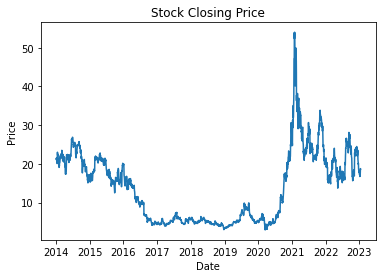

In [4]:
plt.plot(df['Adj Close'])
plt.title('Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')

In [5]:
df = df.reset_index()

# Modifying the df to store only the closing price

In [6]:
df = df['Adj Close'].values
df = df.reshape(-1, 1)

In [7]:
df

array([[21.15258789],
       [21.43418503],
       [21.24427032],
       ...,
       [18.70999908],
       [18.78000069],
       [18.65999985]])

Creating two datasets namingly train and test containing 80% and 20% of df data correspondingly

In [8]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

# Scaling the data btw 0,1

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

Training model for 50 days and predicting for 51st day

In [10]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

# Dividing dataset into train and test data

In [11]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# LSTM Model 

In [13]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50

56/56 [==============================] - 7s 62ms/step - loss: 0.0051
Epoch 2/50
56/56 [==============================] - 3s 61ms/step - loss: 0.0022
Epoch 3/50
56/56 [==============================] - 3s 61ms/step - loss: 0.0018
Epoch 4/50
56/56 [==============================] - 3s 60ms/step - loss: 0.0021
Epoch 5/50
56/56 [==============================] - 3s 61ms/step - loss: 0.0018
Epoch 6/50
56/56 [==============================] - 3s 61ms/step - loss: 0.0016
Epoch 7/50
56/56 [==============================] - 3s 60ms/step - loss: 0.0017
Epoch 8/50
56/56 [==============================] - 4s 65ms/step - loss: 0.0015
Epoch 9/50
56/56 [==============================] - 3s 62ms/step - loss: 0.0014
Epoch 10/50
56/56 [==============================] - 3s 61ms/step - loss: 0.0012
Epoch 11/50
56/56 [==============================] - 3s 60ms/step - loss: 0.0014
Epoch 12/50
56/56 [==============================] - 4s 63ms/step - loss: 0.0013
Epoch 13/50
56/56 [=================

## Predictions

13/13 [==============================] - 1s 23ms/step


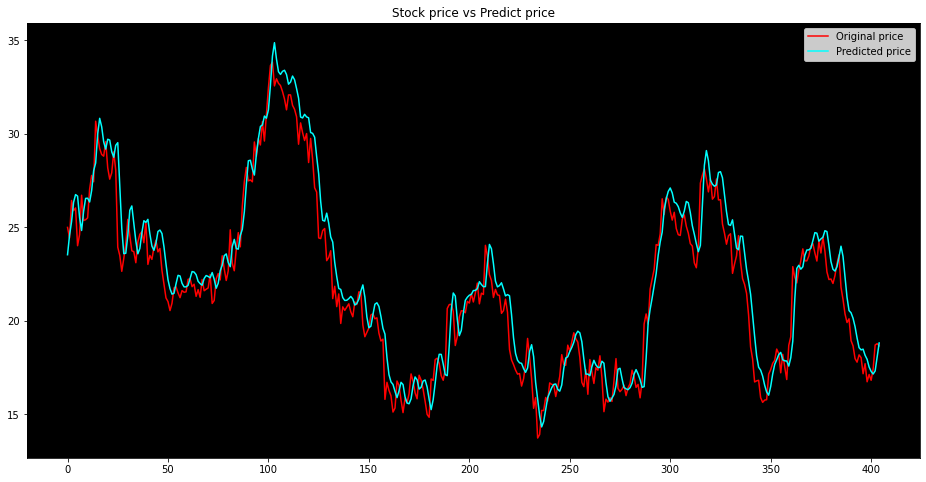

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('black')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.title('Stock price vs Predict price')
plt.legend()

# Testing our model to find closing price for "15th January 2023"

In [18]:
print("Predicted value on 15th January 2023 is",predictions[-1][0])

Predicted value on 15th January 2023 is 18.815853
